In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.count = 0  # frequency of passing words
        self.is_end = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
            node.count += 1
        node.is_end = True

    def find_split(self, word):
        """Return (stem, suffix) using branching node rule"""
        node = self.root
        split_index = 0
        for i, ch in enumerate(word):
            if ch in node.children:
                node = node.children[ch]
                if len(node.children) > 1:  # branching
                    split_index = i + 1
            else:
                break
        return word[:split_index], word[split_index:]


def build_prefix_trie(words):
    t = Trie()
    for w in words:
        t.insert(w)
    return t

def build_suffix_trie(words):
    t = Trie()
    for w in words:
        t.insert(w[::-1])  # reversed word
    return t


# ---------------- MAIN ----------------
if __name__ == "__main__":
    # Load dataset
    with open("brown_nouns.txt") as f:
        words = [line.strip().lower() for line in f if line.strip()]

    # Build prefix trie
    prefix_trie = build_prefix_trie(words)

    print("Prefix Trie Stemming:")
    for w in words[:20]:  # show first 20 words
        stem, suffix = prefix_trie.find_split(w)
        print(f"{w} = {stem}+{suffix}" if suffix else f"{w} = {stem}")

    # Build suffix trie
    suffix_trie = build_suffix_trie(words)

    print("\nSuffix Trie Stemming:")
    for w in words[:20]:
        s_stem, s_suffix = suffix_trie.find_split(w[::-1])
        # reverse parts back
        print(f"{w} = {w[::-1][len(s_stem):][::-1]}+{s_stem[::-1]}")


Prefix Trie Stemming:
investigation = investigat+ion
primary = primar+y
election = electi+on
evidence = evi+dence
irregularities = irregularit+ies
place = place
jury = jur+y
presentments = present+ments
charge = char+ge
election = electi+on
praise = prai+se
thanks = thank+s
manner = manner
election = electi+on
term = term
jury = jur+y
reports = report+s
irregularities = irregularit+ies
primary = primar+y
handful = hand+ful

Suffix Trie Stemming:
investigation = inve+stigation
primary = pri+mary
election = +election
evidence = e+vidence
irregularities = irregu+larities
place = +place
jury = +jury
presentments = prese+ntments
charge = ch+arge
election = +election
praise = pr+aise
thanks = th+anks
manner = m+anner
election = +election
term = t+erm
jury = +jury
reports = re+ports
irregularities = irregu+larities
primary = pri+mary
handful = hand+ful


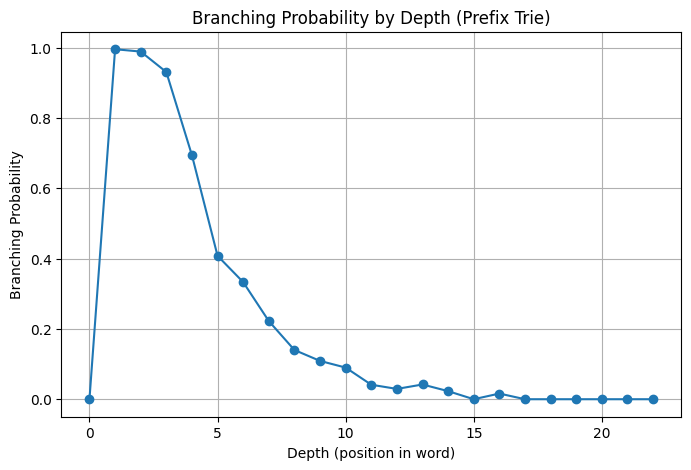

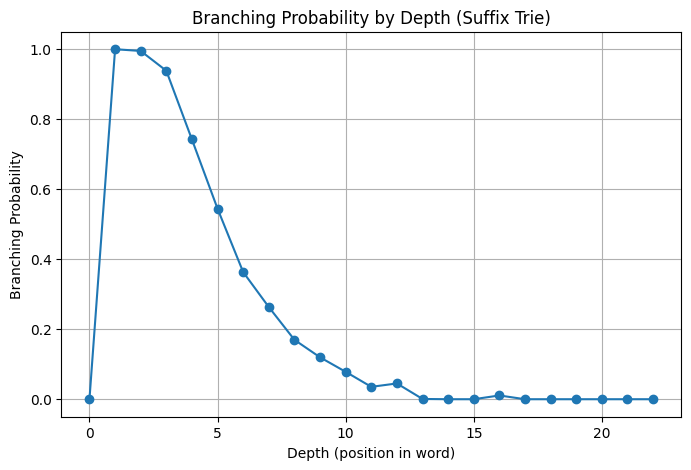

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def collect_branching_stats(trie):
    """
    Traverse trie and collect branching information:
    depth -> (branching_count, total_count)
    """
    stats = defaultdict(lambda: [0, 0])  # depth -> [branching_sum, total_sum]

    def dfs(node, depth):
        if not node:
            return
        # total words passing this node
        stats[depth][1] += node.count
        # branching if more than one child
        if len(node.children) > 1:
            stats[depth][0] += node.count
        for child in node.children.values():
            dfs(child, depth + 1)

    dfs(trie.root, 0)
    return stats

def plot_branching_probability(stats, title):
    depths = sorted(stats.keys())
    probs = [stats[d][0] / stats[d][1] if stats[d][1] > 0 else 0 for d in depths]

    plt.figure(figsize=(8,5))
    plt.plot(depths, probs, marker='o')
    plt.xlabel("Depth (position in word)")
    plt.ylabel("Branching Probability")
    plt.title(title)
    plt.grid(True)
    plt.show()


# ---------------- MAIN ----------------
if __name__ == "__main__":
    # Load dataset
    with open("brown_nouns.txt") as f:
        words = [line.strip().lower() for line in f if line.strip()]

    # Prefix trie
    prefix_trie = build_prefix_trie(words)
    prefix_stats = collect_branching_stats(prefix_trie)
    plot_branching_probability(prefix_stats, "Branching Probability by Depth (Prefix Trie)")

    # Suffix trie
    suffix_trie = build_suffix_trie(words)
    suffix_stats = collect_branching_stats(suffix_trie)
    plot_branching_probability(suffix_stats, "Branching Probability by Depth (Suffix Trie)")


👉 Upload your Gujarati font file (e.g., NotoSansGujarati-Regular.ttf)


Saving NotoSansGujarati-Regular.ttf to NotoSansGujarati-Regular (1).ttf
✅ Frequency distribution built


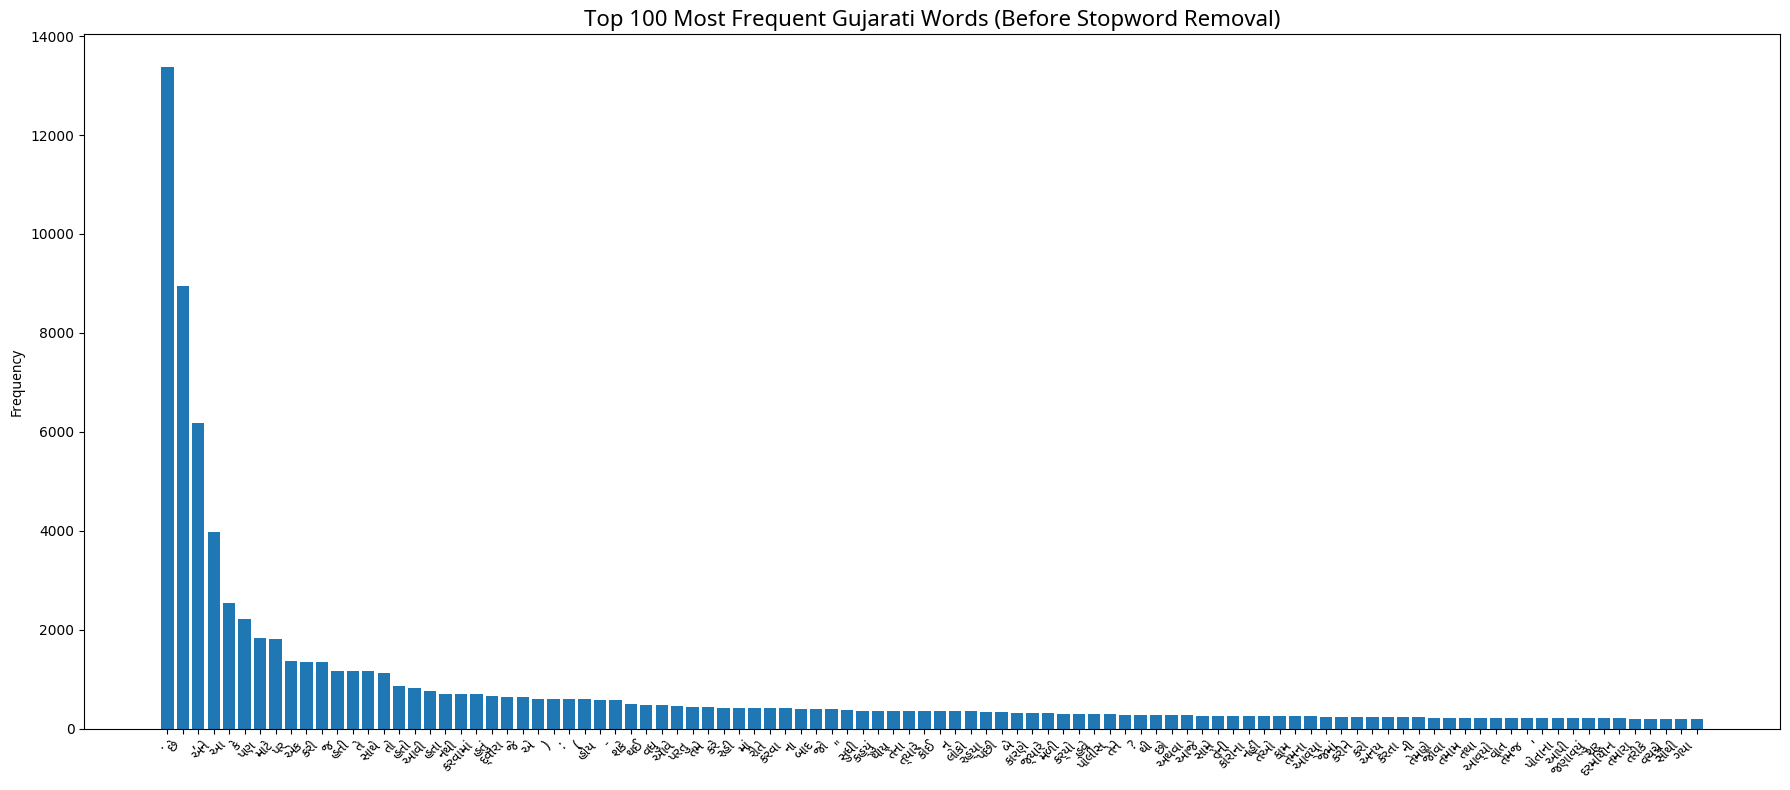

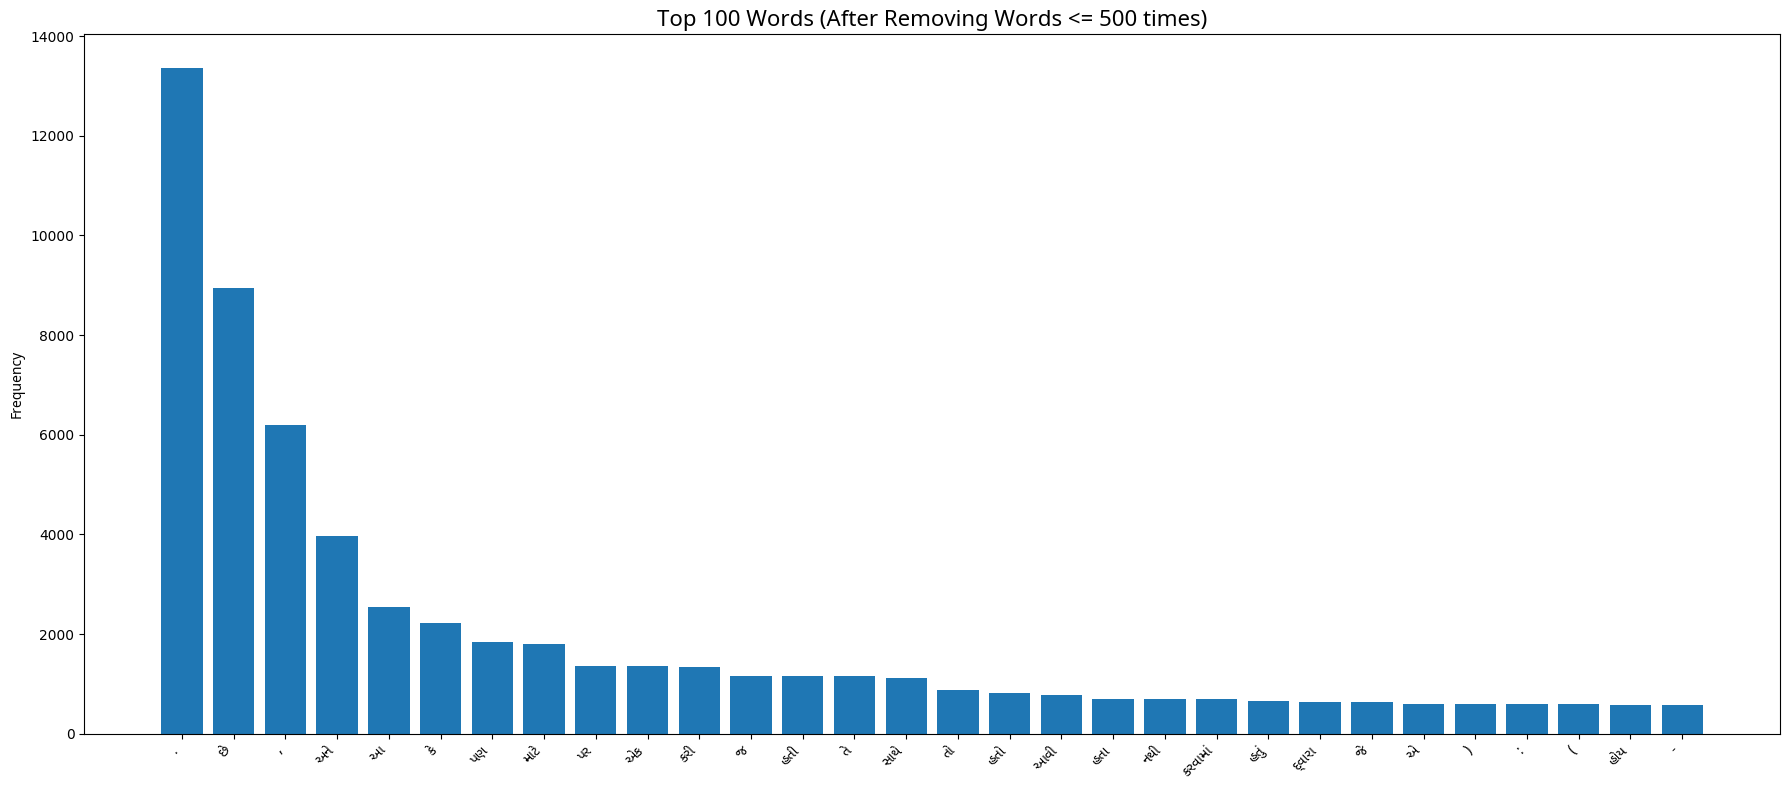

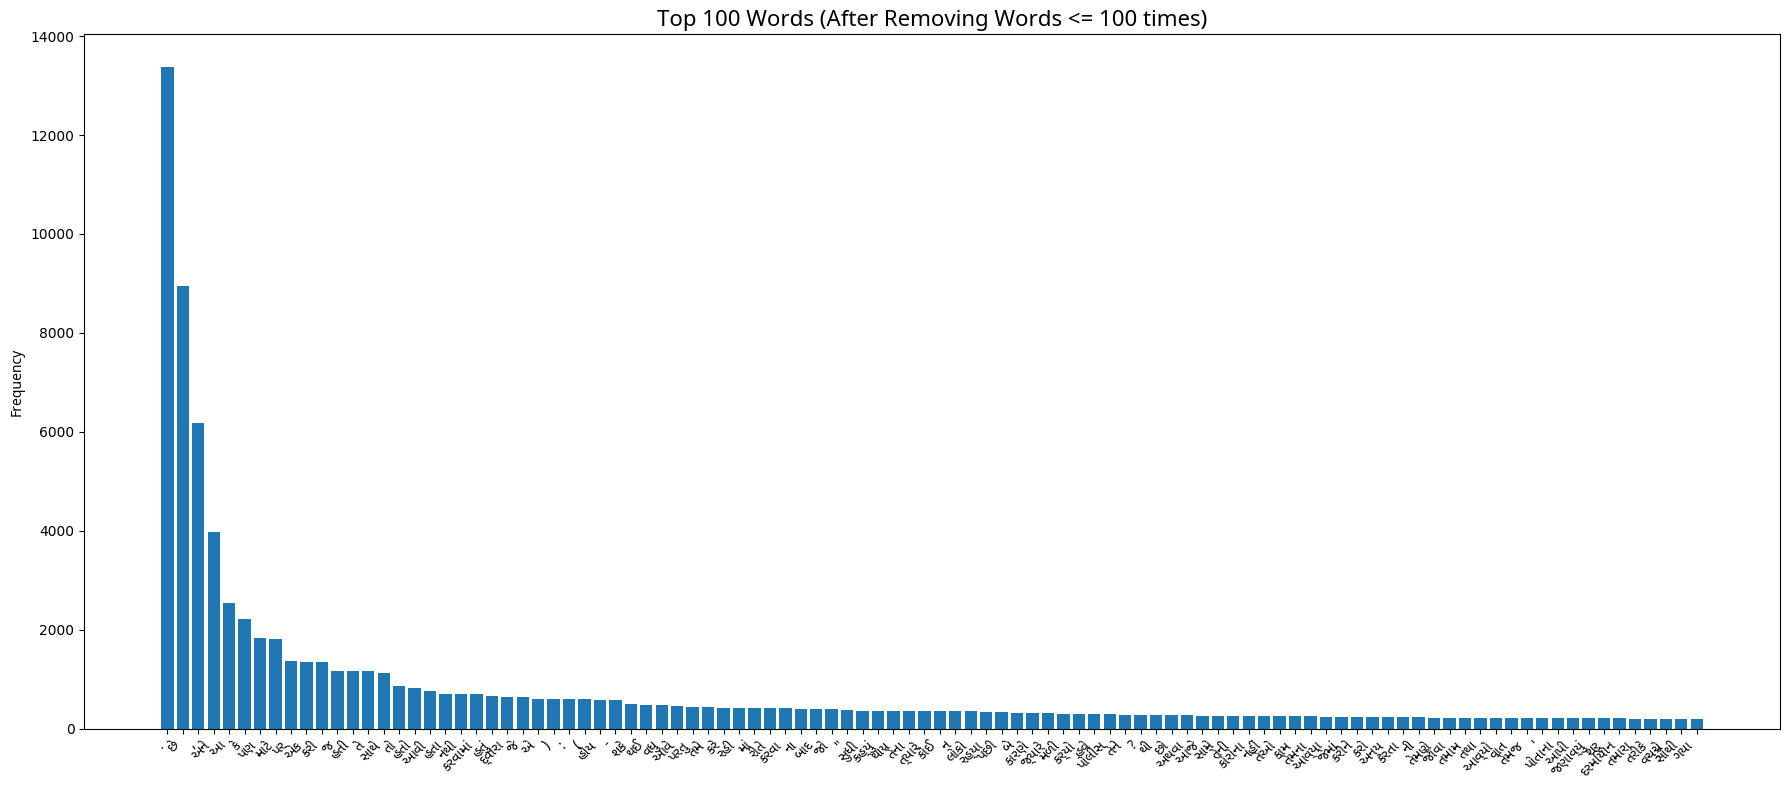

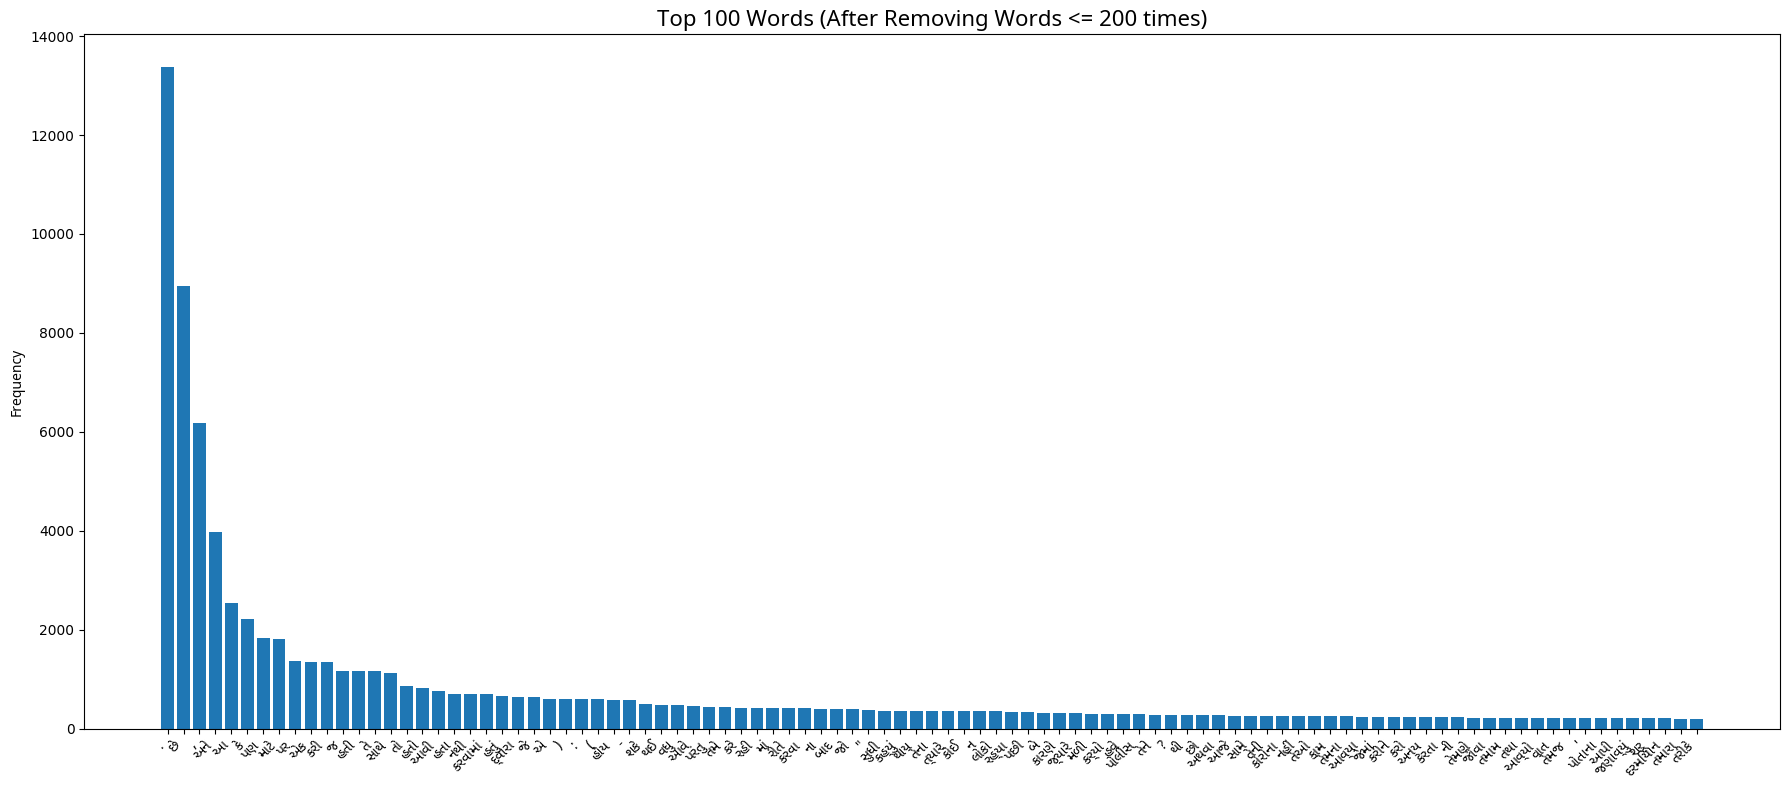

In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import files

# ---------- Step 1: Upload Gujarati font ----------
print("👉 Upload your Gujarati font file (e.g., NotoSansGujarati-Regular.ttf)")
uploaded = files.upload()   # select the .ttf file from your computer
font_path = list(uploaded.keys())[0]  # take first uploaded file
guj_font = fm.FontProperties(fname=font_path)

# ---------- Step 2: Load the tokenized dataset ----------
table = pq.read_table("tokenized_gujarati_sentences.parquet")
df = table.to_pandas()

# ---------- Step 3: Build frequency distribution ----------
freq_dict = {}
for sentence in df["sentence"]:
    words = sentence.split()
    for w in words:
        w = w.strip()
        if not w:
            continue
        if w not in freq_dict:
            freq_dict[w] = 0
        freq_dict[w] += 1

print("✅ Frequency distribution built")

# ---------- Step 4: Convert to DataFrame ----------
freq_df = pd.DataFrame(list(freq_dict.items()), columns=["word", "frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

# ---------- Step 5: Plot top 100 words ----------
def plot_top_words(dataframe, title):
    top_words = dataframe.head(100)
    plt.figure(figsize=(18, 8))
    plt.bar(top_words["word"], top_words["frequency"])
    plt.xticks(rotation=45, fontsize=10, fontproperties=guj_font, ha="right")
    plt.title(title, fontproperties=guj_font, fontsize=16)
    plt.ylabel("Frequency", fontproperties=guj_font)
    plt.tight_layout()
    plt.show()

plot_top_words(freq_df, "Top 100 Most Frequent Gujarati Words (Before Stopword Removal)")

# ---------- Step 6: Function for stopword removal by threshold ----------
def plot_after_stopword_removal(threshold):
    # remove words with frequency <= threshold
    filtered_df = freq_df[freq_df["frequency"] > threshold]
    filtered_df = filtered_df.sort_values(by="frequency", ascending=False)
    plot_top_words(filtered_df, f"Top 100 Words (After Removing Words <= {threshold} times)")

# ---------- Step 7: Try with three thresholds ----------
for t in [500, 100, 200]:
    plot_after_stopword_removal(t)
